In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

In [19]:
# Load dataset
iris_data = sns.load_dataset("iris")
df_iris = pd.DataFrame(iris_data, columns=iris_data.columns)

In [20]:
#Data cleansing
#cek missing value
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
#cek data duplikat
df_iris.duplicated().sum()

1

In [22]:
# Remove duplicate rows
df_iris.drop_duplicates(inplace=True)

In [23]:
df_iris.duplicated().sum()

0

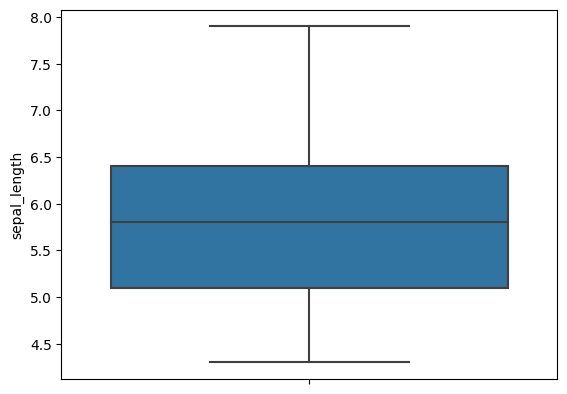

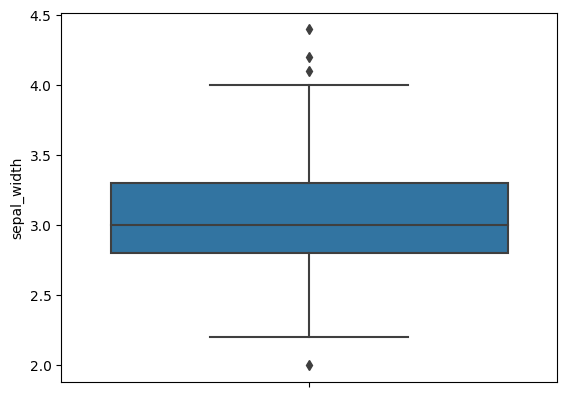

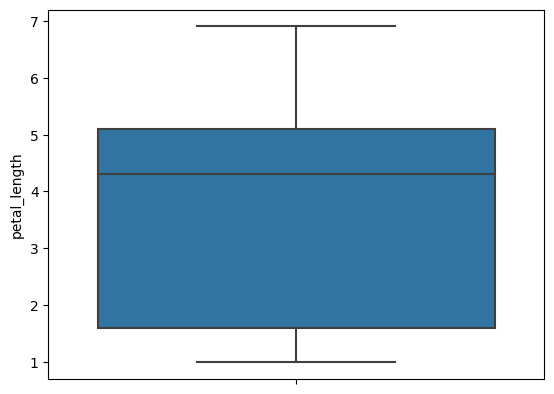

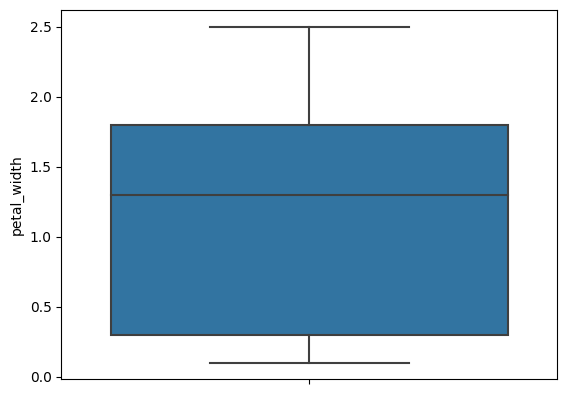

In [29]:
cols = df_iris.columns[0:-1]
for i in cols:
    sns.boxplot(y=df_iris[i])
    plt.show()

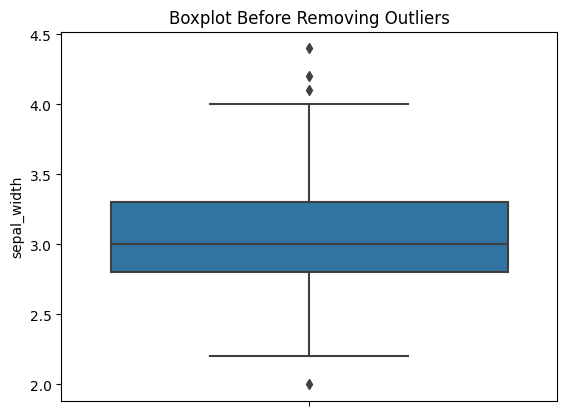

In [8]:
sns.boxplot(y=df_iris['sepal_width'])
plt.title("Boxplot Before Removing Outliers")
plt.show()

In [9]:
# Handle outliers in the 'sepal_width' column
q1 = df_iris['sepal_width'].quantile(0.25)
q3 = df_iris['sepal_width'].quantile(0.75)
iqr = q3 - q1
df_iris = df_iris[(df_iris['sepal_width'] >= q1 - 1.5 * iqr) & (df_iris['sepal_width'] <= q3 + 1.5 * iqr)]


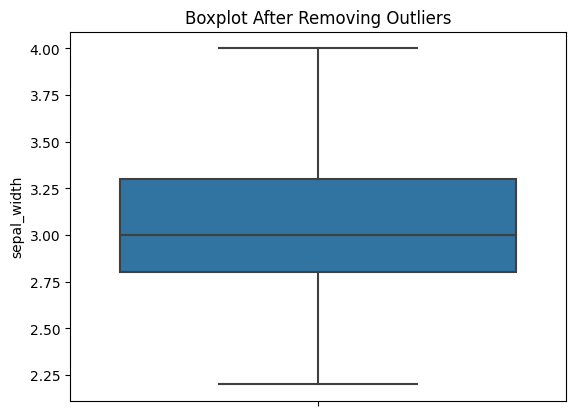

In [10]:
# Check for outliers again after removing outliers
sns.boxplot(y=df_iris['sepal_width'])
plt.title("Boxplot After Removing Outliers")
plt.show()

In [11]:
# Split data into features (X) and target (y)
X = df_iris.drop("species", axis=1)
y = df_iris["species"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)

In [12]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

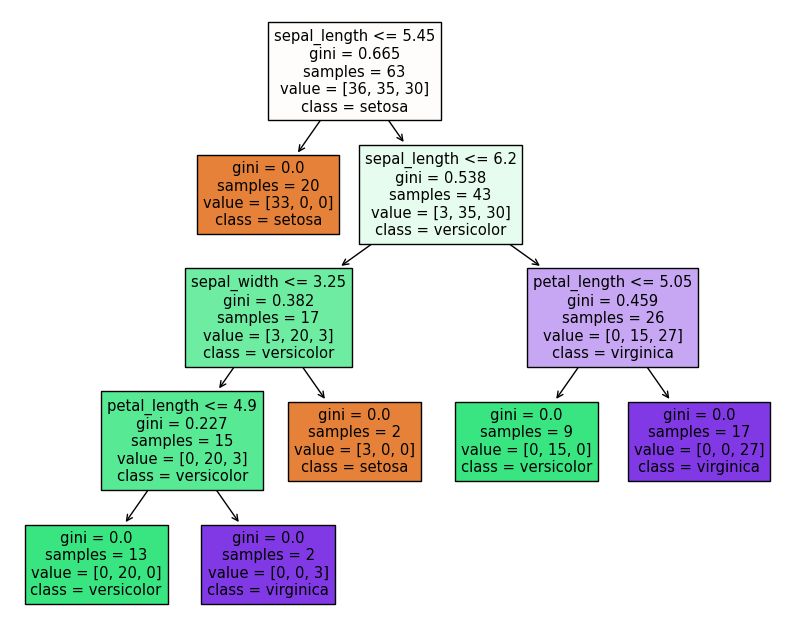

In [13]:
# Visualize a decision tree from the Random Forest (Optional)
plt.figure(figsize=(10, 8))
estimator = rf_classifier.estimators_[0]  # You can choose a specific tree from the forest
plot_tree(estimator, filled=True, feature_names=X.columns.tolist(), class_names=df_iris["species"].unique().tolist())
plt.show()

In [14]:
# Make predictions using the test set
y_pred = rf_classifier.predict(X_test)

In [15]:
# Evaluate the model
print(f"Accuracy of Random Forest Test: {accuracy_score(y_pred, y_test)}")
print(classification_report(y_test, y_pred))

Accuracy of Random Forest Test: 0.9545454545454546
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      0.94      0.94        17
   virginica       0.93      0.93      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.96        44
weighted avg       0.95      0.95      0.95        44

